  Age Group  Year Period  Unemployment_Rate
0     16-19  2024    M09               14.3
1     16-19  2024    M08               14.1
2     16-19  2024    M07               12.4
3     16-19  2024    M06               12.1
4     16-19  2024    M05               12.3


/var/folders/hc/2j5zlvh15b94r1h97wl5qsfc0000gn/T/ipykernel_91097/1589099430.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]  # 10 years * 12 months
/var/folders/hc/2j5zlvh15b94r1h97wl5qsfc0000gn/T/ipykernel_91097/1589099430.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]  # 10 years * 12 months
/var/folders/hc/2j5zlvh15b94r1h97wl5qsfc0000gn/T/ipykernel_91097/1589099430.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]  # 10 years * 12 months
/var/folders/hc/2j5zlvh15b94r1h97wl5qsfc0000gn/T/ipykernel_91097/1589099430.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, 

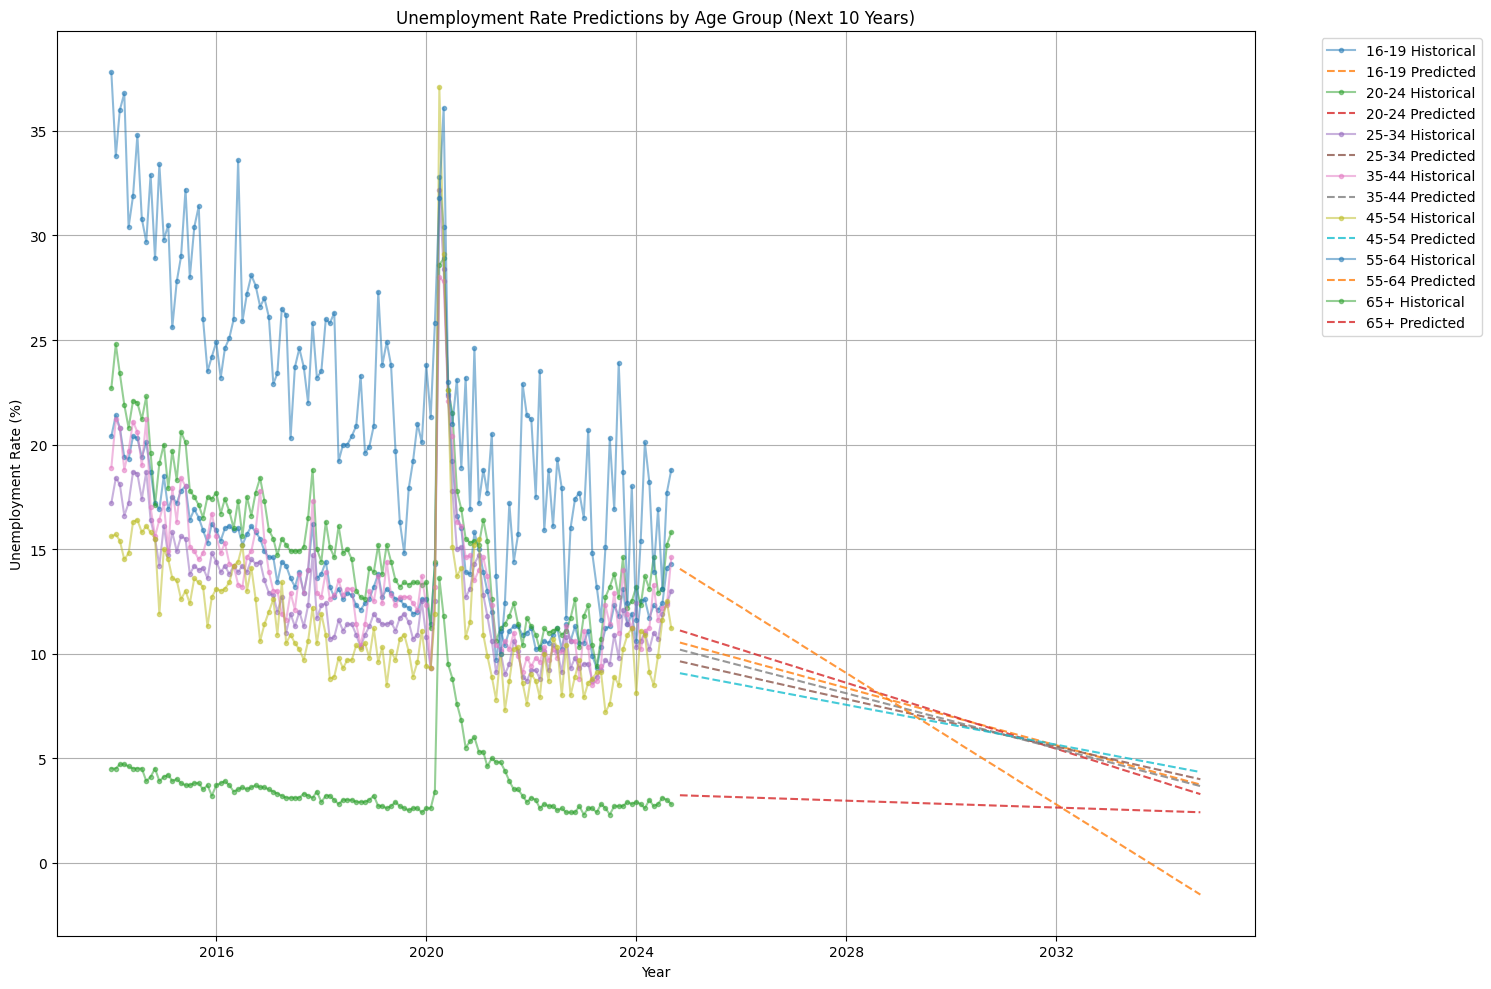


Predicted Unemployment Rates by Age Group:

16-19:
Date
2024-12-31    10.5
2025-12-31    10.0
2026-12-31     9.4
2027-12-31     8.7
2028-12-31     8.0
2029-12-31     7.3
2030-12-31     6.6
2031-12-31     5.9
2032-12-31     5.2
2033-12-31     4.6
2034-12-31     4.0
Freq: YE-DEC, Name: Predicted_Rate, dtype: float64

20-24:
Date
2024-12-31    11.0
2025-12-31    10.5
2026-12-31     9.8
2027-12-31     9.0
2028-12-31     8.2
2029-12-31     7.4
2030-12-31     6.6
2031-12-31     5.8
2032-12-31     5.0
2033-12-31     4.2
2034-12-31     3.5
Freq: YE-DEC, Name: Predicted_Rate, dtype: float64

25-34:
Date
2024-12-31    9.6
2025-12-31    9.2
2026-12-31    8.7
2027-12-31    8.1
2028-12-31    7.5
2029-12-31    6.9
2030-12-31    6.4
2031-12-31    5.8
2032-12-31    5.2
2033-12-31    4.7
2034-12-31    4.2
Freq: YE-DEC, Name: Predicted_Rate, dtype: float64

35-44:
Date
2024-12-31    10.1
2025-12-31     9.7
2026-12-31     9.1
2027-12-31     8.4
2028-12-31     7.7
2029-12-31     7.1
2030-12-31     6.4
20

/var/folders/hc/2j5zlvh15b94r1h97wl5qsfc0000gn/T/ipykernel_91097/1589099430.py:68: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_pred = yearly_pred.resample('Y').mean()


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('../data/bls_unemployment_by_age_group.csv')
print(df.head())

# Convert Period to numeric month
df['Month'] = df['Period'].str[1:].astype(int)

# Create a datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Create separate models for each age group
age_groups = df['Age Group'].unique()
plt.figure(figsize=(15, 10))

# Dictionary to store predictions
predictions_by_age = {}

for age_group in age_groups:
    # Filter data for this age group
    age_data = df[df['Age Group'] == age_group].copy()
    
    # Prepare data for linear regression
    X = (age_data['Year'] + age_data['Month']/12).values.reshape(-1, 1)
    y = age_data['Unemployment_Rate'].values
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Generate future dates for prediction (10 years, monthly)
    last_date = age_data['Date'].max()
    future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]  # 10 years * 12 months
    future_X = (future_dates.year + future_dates.month/12).values.reshape(-1, 1)
    
    # Make predictions
    future_predictions = model.predict(future_X)
    
    # Store predictions
    predictions_by_age[age_group] = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Rate': future_predictions
    })
    
    # Plot historical data and predictions
    plt.plot(age_data['Date'], age_data['Unemployment_Rate'], 
             marker='.', linestyle='-', alpha=0.5, label=f'{age_group} Historical')
    plt.plot(future_dates, future_predictions, 
             linestyle='--', alpha=0.8, label=f'{age_group} Predicted')

plt.title('Unemployment Rate Predictions by Age Group (Next 10 Years)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print predictions for each age group
print("\nPredicted Unemployment Rates by Age Group:")
for age_group in age_groups:
    print(f"\n{age_group}:")
    yearly_pred = predictions_by_age[age_group].set_index('Date')['Predicted_Rate']
    yearly_pred = yearly_pred.resample('Y').mean()
    print(yearly_pred.round(1)) 

In [3]:
# Define base population estimates for each channel (these are example numbers)
channel_population = {
    'Industry': {
        'total_pool': 1_000_000,  # Domestic workforce in relevant industry
        'distribution': {
            '16 to 19 years': 0.00,  # Almost none
            '20 to 24 years': 0.10,  # 10% of industry workforce
            '25 to 34 years': 0.35,  # 35% of industry workforce
            '35 to 44 years': 0.30,  # 30% of industry workforce
            '45 to 54 years': 0.15,  # 15% of industry workforce
            '55 years and over': 0.10  # 10% of industry workforce
        }
    },
    'Student': {
        'total_pool': 200_000,  # Annual graduates in relevant fields
        'distribution': {
            '16 to 19 years': 0.05,  # High school/early college
            '20 to 24 years': 0.60,  # Bachelor's graduates
            '25 to 34 years': 0.30,  # Master's/PhD students
            '35 to 44 years': 0.04,  # Career changers
            '45 to 54 years': 0.007,  # Rare cases
            '55 years and over': 0.003  # Very rare cases
        }
    },
    'International': {
        'total_pool': 500_000,  # Potential international candidates
        'distribution': {
            '16 to 19 years': 0.02,  # International students
            '20 to 24 years': 0.25,  # Fresh graduates
            '25 to 34 years': 0.40,  # Early career
            '35 to 44 years': 0.20,  # Mid career
            '45 to 54 years': 0.10,  # Senior level
            '55 years and over': 0.03  # Expert level
        }
    }
}

# Keep the qualification rates from before
hiring_channels = {
    'Industry': {
        '16 to 19 years': {'qualified_rate': 0.0},
        '20 to 24 years': {'qualified_rate': 0.15},
        '25 to 34 years': {'qualified_rate': 0.45},
        '35 to 44 years': {'qualified_rate': 0.60},
        '45 to 54 years': {'qualified_rate': 0.55},
        '55 years and over': {'qualified_rate': 0.40}
    },
    'Student': {
        '16 to 19 years': {'qualified_rate': 0.10},
        '20 to 24 years': {'qualified_rate': 0.35},
        '25 to 34 years': {'qualified_rate': 0.25},
        '35 to 44 years': {'qualified_rate': 0.05},
        '45 to 54 years': {'qualified_rate': 0.02},
        '55 years and over': {'qualified_rate': 0.01}
    },
    'International': {
        '16 to 19 years': {'qualified_rate': 0.05},
        '20 to 24 years': {'qualified_rate': 0.30},
        '25 to 34 years': {'qualified_rate': 0.50},
        '35 to 44 years': {'qualified_rate': 0.45},
        '45 to 54 years': {'qualified_rate': 0.35},
        '55 years and over': {'qualified_rate': 0.20}
    }
}
# Create a mapping between the two formats
age_group_mapping = {
    '16 to 19 years': '16-19',
    '20 to 24 years': '20-24',
    '25 to 34 years': '25-34',
    '35 to 44 years': '35-44',
    '45 to 54 years': '45-54',
    '55 years and over': '55+'
}

# Calculate feasible hires for each channel and age group
for channel, data in channel_population.items():
    print(f"\n{channel} Channel Feasible Hires:")
    print("Age Group | Base Pool | Unemployment | Qualified Rate | Feasible Hires")
    print("-" * 75)
    
    total_feasible = 0
    for age_group, distribution in data['distribution'].items():
        # Calculate base population for this age group
        base_pool = data['total_pool'] * distribution
        
        # Get predicted unemployment rate for 2024 using the mapped age group
        mapped_age_group = age_group_mapping[age_group]
        if mapped_age_group in predictions_by_age:
            pred_2024 = predictions_by_age[mapped_age_group].loc[
                predictions_by_age[mapped_age_group]['Date'].dt.year == 2024, 
                'Predicted_Rate'
            ].iloc[0] / 100  # Convert percentage to decimal
            
            # Calculate feasible hires
            qualified_rate = hiring_channels[channel][age_group]['qualified_rate']
            feasible_hires = base_pool * pred_2024 * qualified_rate
            total_feasible += feasible_hires
            
            print(f"{age_group:<20} | {base_pool:>9,.0f} | {pred_2024:>11.1%} | {qualified_rate:>13.1%} | {feasible_hires:>14,.0f}")
    
    print("-" * 75)
    print(f"Total Feasible Hires: {total_feasible:,.0f}")


Industry Channel Feasible Hires:
Age Group | Base Pool | Unemployment | Qualified Rate | Feasible Hires
---------------------------------------------------------------------------
16 to 19 years       |         0 |       10.5% |          0.0% |              0
20 to 24 years       |   100,000 |       11.1% |         15.0% |          1,666
25 to 34 years       |   350,000 |        9.6% |         45.0% |         15,163
35 to 44 years       |   300,000 |       10.2% |         60.0% |         18,337
45 to 54 years       |   150,000 |        9.1% |         55.0% |          7,475
---------------------------------------------------------------------------
Total Feasible Hires: 42,641

Student Channel Feasible Hires:
Age Group | Base Pool | Unemployment | Qualified Rate | Feasible Hires
---------------------------------------------------------------------------
16 to 19 years       |    10,000 |       10.5% |         10.0% |            105
20 to 24 years       |   120,000 |       11.1% |      

In [4]:

# Calculate feasible hires for each channel and age group by year
years = range(2024, 2034)
feasible_by_year_channel = {year: {} for year in years}

for year in years:
    print(f"\n=== Feasible Hires for {year} ===")
    
    for channel, data in channel_population.items():
        total_feasible = 0
        print(f"\n{channel} Channel:")
        print("Age Group | Base Pool | Unemployment | Qualified Rate | Feasible Hires")
        print("-" * 75)
        
        for age_group, distribution in data['distribution'].items():
            # Calculate base population for this age group
            base_pool = data['total_pool'] * distribution
            
            # Get predicted unemployment rate for the current year
            mapped_age_group = age_group_mapping[age_group]
            if mapped_age_group in predictions_by_age:
                pred_rate = predictions_by_age[mapped_age_group].loc[
                    predictions_by_age[mapped_age_group]['Date'].dt.year == year, 
                    'Predicted_Rate'
                ].iloc[0] / 100
                
                # Calculate feasible hires
                qualified_rate = hiring_channels[channel][age_group]['qualified_rate']
                feasible_hires = base_pool * pred_rate * qualified_rate
                total_feasible += feasible_hires
                
                print(f"{age_group:<20} | {base_pool:>9,.0f} | {pred_rate:>11.1%} | {qualified_rate:>13.1%} | {feasible_hires:>14,.0f}")
        
        print("-" * 75)
        print(f"Total Feasible Hires: {total_feasible:,.0f}")
        feasible_by_year_channel[year][channel] = total_feasible

# Create summary table
print("\n=== Summary: Feasible Hires by Year and Channel ===")
print("Year |", " | ".join(f"{channel:>12}" for channel in channel_population.keys()))
print("-" * 60)
for year in years:
    print(f"{year} |", " | ".join(f"{feasible_by_year_channel[year][channel]:>12,.0f}" for channel in channel_population.keys()))


=== Feasible Hires for 2024 ===

Industry Channel:
Age Group | Base Pool | Unemployment | Qualified Rate | Feasible Hires
---------------------------------------------------------------------------
16 to 19 years       |         0 |       10.5% |          0.0% |              0
20 to 24 years       |   100,000 |       11.1% |         15.0% |          1,666
25 to 34 years       |   350,000 |        9.6% |         45.0% |         15,163
35 to 44 years       |   300,000 |       10.2% |         60.0% |         18,337
45 to 54 years       |   150,000 |        9.1% |         55.0% |          7,475
---------------------------------------------------------------------------
Total Feasible Hires: 42,641

Student Channel:
Age Group | Base Pool | Unemployment | Qualified Rate | Feasible Hires
---------------------------------------------------------------------------
16 to 19 years       |    10,000 |       10.5% |         10.0% |            105
20 to 24 years       |   120,000 |       11.1% |   

In [5]:
def get_feasible_hires_by_year(channel_population, hiring_channels, predictions_by_age, age_group_mapping):
    """
    Calculate feasible hires for each year from 2024 to 2033
    
    Returns:
    DataFrame with columns: Year, Feasible_Hires
    """
    years = range(2024, 2034)
    feasible_hires = pd.DataFrame(index=years, columns=['Feasible_Hires'])
    
    for year in years:
        total_feasible = 0
        for channel, data in channel_population.items():
            for age_group, distribution in data['distribution'].items():
                base_pool = data['total_pool'] * distribution
                mapped_age_group = age_group_mapping[age_group]
                
                if mapped_age_group in predictions_by_age:
                    pred_rate = predictions_by_age[mapped_age_group].loc[
                        predictions_by_age[mapped_age_group]['Date'].dt.year == year, 
                        'Predicted_Rate'
                    ].iloc[0] / 100
                    
                    qualified_rate = hiring_channels[channel][age_group]['qualified_rate']
                    feasible_hires.loc[year, 'Feasible_Hires'] = base_pool * pred_rate * qualified_rate
                    total_feasible += feasible_hires.loc[year, 'Feasible_Hires']
        
        feasible_hires.loc[year, 'Feasible_Hires'] = total_feasible
    
    return feasible_hires